# A Beginner’s Guide to Building a k-Nearest Neighbors (KNN) Classifier

Machine learning is a powerful tool that helps us make predictions and classify data. In this notebook, we will guide you step-by-step to build a k-Nearest Neighbors (KNN) model using Python and scikit-learn. We will use the Wine dataset, a simple yet versatile dataset, to illustrate how KNN works.

By the end of this tutorial, you will:
- Understand the basics of KNN
- Learn how to preprocess data for KNN
- Build and evaluate a KNN classifier using scikit-learn
- Find the best value for the number of neighbors (‘k’)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

## Step 0: What is KNN?

KNN (k-Nearest Neighbors) is a fundamental supervised machine learning algorithm used for both classification and regression tasks.

**Core Concepts:**

1. Basic Principle:
   - For a new data point x, find k closest training samples in the feature space
   - For classification: Take majority vote of the k neighbors
   - For regression: Take average of the k neighbors

2. Distance Metrics:
   The most commonly used distance metric is Euclidean distance:
   $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

3. Algorithm Steps:
   The algorithm stores all training data points and for each new data point:
   - Calculates distance to all training points
   - Finds k nearest neighbors
   - Takes majority vote (classification) or average (regression)
   - Assigns the result to the new point

**Advantages and Disadvantages:**

KNN is simple to understand, requires no training period, and handles multi-class problems well. It works effectively with both linear and non-linear data. However, it can be computationally expensive for large datasets and is sensitive to irrelevant features and outliers. The algorithm requires feature scaling and can be memory-intensive. It also suffers from the curse of dimensionality, where performance degrades with high-dimensional data.

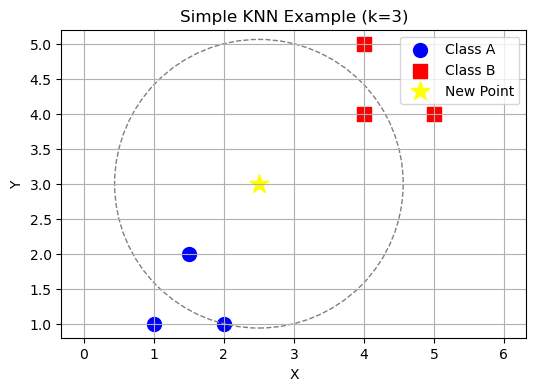

In [14]:
# data points
class_a = np.array([[1, 1], [1.5, 2], [2, 1]])
class_b = np.array([[4, 4], [4, 5], [5, 4]])
new_point = np.array([2.5, 3])

# Create the plot
plt.figure(figsize=(6, 4))
plt.scatter(class_a[:, 0], class_a[:, 1], c='blue', marker='o', s=100, label='Class A')
plt.scatter(class_b[:, 0], class_b[:, 1], c='red', marker='s', s=100, label='Class B')
plt.scatter(new_point[0], new_point[1], c='yellow', marker='*', s=200, label='New Point')

# Circle for k=3 nearest neighbors
distances = np.sqrt(np.sum((np.vstack([class_a, class_b]) - new_point)**2, axis=1))
k = 3
radius = sorted(distances)[k-1]
circle = plt.Circle((new_point[0], new_point[1]), radius, fill=False, linestyle='--', color='gray')
plt.gca().add_artist(circle)

plt.title('Simple KNN Example (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In this example, we have two clearly separated classes:
   - Class A (blue circles): 3 points in the bottom-left
   - Class B (red squares): 3 points in the top-right

The yellow star represents a new point we want to classify. The dashed circle shows the boundary of the 3 nearest neighbors

Looking at the points inside the circle, we can see that more points belong to Class A. **Therefore, the new point would be classified as Class A**

This simple example shows how KNN makes decisions based on the majority class among the nearest neighbors


## Step 1: Load and Explore the Dataset

The Wine dataset is a classic machine learning dataset containing chemical analysis results of wines from Italy. Each sample represents a wine with:
- Features: 13 chemical measurements (alcohol content, malic acid, etc.)
- Classes: 3 different wine varieties
- Size: 178 samples

In [16]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

In [19]:
# Convert to DataFrame for easier exploration
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = y

# Display the first few rows
print(wine_df.shape)
wine_df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
# Check dataset distribution
print(wine_df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64



## Step 2: Preprocess the Data

Preprocessing is crucial for KNN because the algorithm relies on distance calculations. Features with different scales can skew the results.


In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 3: Build and Train the KNN Model

Now, we’ll create a KNN classifier and train it on the training data.


In [22]:
# Create the KNN model
k = 3  # Set a initial value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)


## Step 4: Find the Best Value for ‘k’

The choice of ‘k’ can significantly impact the model’s performance. We will use cross-validation to determine the optimal value for ‘k’.


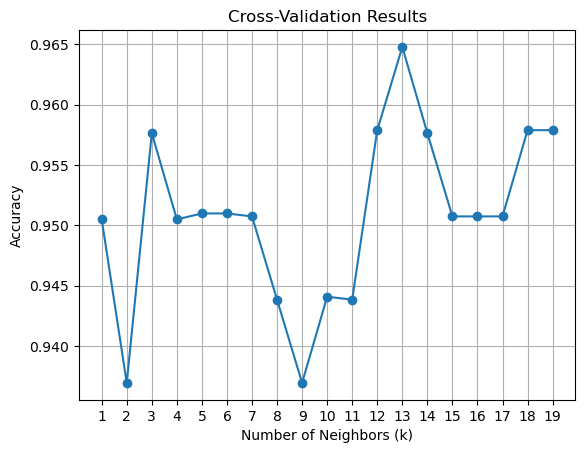

The best value of k is 13 with an accuracy of 0.96


In [26]:
# Test different values of k
k_values = range(1, 20)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot cross-validation results
plt.plot(k_values, k_scores, marker='o')
plt.title('Cross-Validation Results')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k
best_k = k_values[np.argmax(k_scores)]
print(f"The best value of k is {best_k} with an accuracy of {max(k_scores):.2f}")


## Step 5: Evaluate the Model

After determining the best `k`, re-train the model and evaluate its performance on the test set.


In [29]:
# Re-train with the best k we found
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


In [31]:
# show confusion matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[14,  0,  0],
       [ 1, 13,  0],
       [ 0,  0,  8]])

In [33]:
# show classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



As we can see the results shown above: the KNN model achieved 97% accuracy on the Wine dataset classification task. 

From the confusion matrix and classification report, we can see the model made 35 correct predictions out of 36 test samples:
  - For Class 0: correctly predicted all 14 samples
  - For Class 1: correctly predicted 13 samples, with 1 sample misclassified as Class 0
  - For Class 2: correctly predicted all 8 samples


## Step 6: Visualize the Results

To better understand the data and model, we can use Principal Component Analysis (PCA) to reduce the data to two dimensions for visualization.


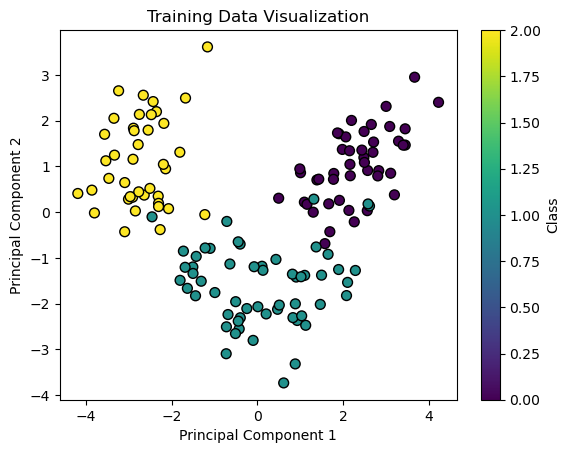

In [35]:
# Visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Scatter plot of training data
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Training Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

## Conclusion

Throughout this tutorial, we've explored the k-Nearest Neighbors algorithm and its practical implementation. We started by understanding the fundamental concepts of KNN, then walked through the complete process of building a classifier using the Wine dataset. 

We learned how to properly preprocess our data, construct the model, and find the optimal number of neighbors through cross-validation. 

Our implementation results with 97% accuracy, demonstrating KNN's effectiveness for classification tasks. KNN is straightforward to understand and implement, it serves as an excellent introduction to machine learning concepts.